# **Projeto da aula**

## **Objetivo:** 
Enviar um e-mail todos os dias com análise das cotações

## **Cenário:** 
Você trabalha em uma empresa de investimentos

## **Etapas do trabalho manual**
1- Entrar no Yahoo Finance

2- Selecionar ação

3- Selecionar o período

4- Fazer download

5- Montar análises

6- Preparar e-mail

7- Enviar e-mail

# Automação de tarefa
## Problema a ser resolvido

- Buscar automaticamente os dados das ações no site do Yahoo!
- Analisar os dados das ações de acordo com a solicitação do gestor
- Enviar um e-mail com todas análises de forma automática

## Passo 1 - Buscar automaticamente os dados das ações no site do Yahoo!

<Axes: xlabel='Date'>

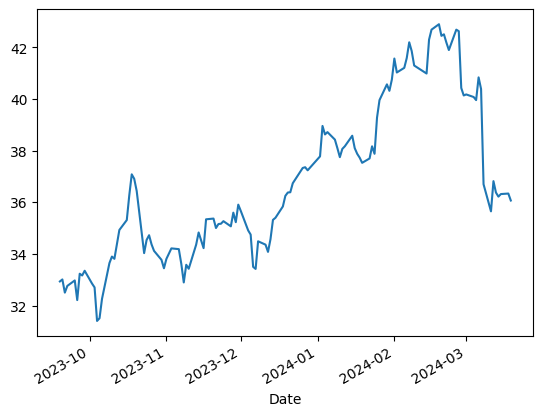

In [8]:
# pip install yfinance
import yfinance

codigo = input("Digite o código da ação desejada: ")

# yfinance.Ticker("PETR4.SA").history() # todos os dados históricos
dados = yfinance.Ticker(codigo).history("6mo") # todos os dados históricos em  meses

fechamento = dados.Close # buxando a coluna de fechamento
# fechamento
fechamento.plot()

## Passo 2 - Análises solicitadas pelo Gestor

- A análise dos últimos seis meses
- Cotação máximo
- Cotação mínimo
- Cotação atual

In [9]:
# cotação máxima
maxima = fechamento.max()
# cotação mínima
minima = fechamento.min()

# print(maxima)
# print(minima)

# Esse jeito de buscar o índice vai parar de funcionar
# fechamento[0] # Primeiro índice
# fechamento[-1] # Último índice

# Cotação atual
atual = fechamento.iloc[-1]

## Passo 3 - Automatizando o envio de e-mail

- Abrir  navegador (chrome)
- Escrever o endereço do Gmail e apertar enter
- Clicar no botão escrever
- Preencher o destinatário, tab
- Preencher o assunto, tab
- Preencher o corpo do email
- Clicar no botão de enviar

In [10]:
# pip install pyautogui
# pip install pyperclip -> se por um acaso não vim ja instalado com o pyautogui
import pyautogui
import pyperclip
import time

pyautogui.PAUSE = 0.5

# abrir  navegador (chrome)
pyautogui.press("win")
pyautogui.write("chrome")
pyautogui.press("enter")

# Escrever o endereço do Gmail e apertar enter
link = "gmail.com"
pyautogui.write(link)
pyautogui.press("enter")

# dar uma pausa um pouco maior (3) segundos
time.sleep(3)

# Clicar no botão escrever
time.sleep(5)
pyautogui.click(x=2556, y=255)

time.sleep(5)

# Preencher o destinatário, tab
email = "email@email.com"
pyperclip.copy(email)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

time.sleep(5)

# Preencher o assunto, tab
assunto = "Análises diárias"
pyperclip.copy("Análises diárias")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

time.sleep(5)

# Preencher o corpo do email
mensagem = f"""
Prezado Gestor,

Seguem as análises dos últimos seis meses da ação {codigo} conforme solicitado:

Cotação máxima: R$ {round(maxima, 2)}
Cotação mínima: R$ {round(minima, 2)}
Cotação atual: R$ {round(atual, 2)}

Qualquer dúvida, estou à disposição!

Atte.

"""

pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")

# Clicar no botão de enviar
time.sleep(5)
pyautogui.click(x=3729, y=1036)

In [11]:
# Saber a posição do mouse na tela
time.sleep(5)
print(pyautogui.position())

Point(x=2743, y=18)
